http://lib.csdn.net/article/machinelearning/32339

## 产生数据

#### 让我们从建立人工数据集开始.你可以轻松的使用sklearn.datasets中的make_classification()函数做到这一点.具体来说,你会生成相对简单的二元分类问题.为了让它更有趣一点,让我们的数据呈现月牙型并加入一些随机噪声.这应该能让其更真实并提高分类观测的难度.

In [1]:
from sklearn.datasets import make_moons

In [2]:
#取500个观察值
X,y = make_moons(n_samples=500,random_state=1,noise=0.3)

In [3]:
print(X[:10])
print(y[:10])

[[ 0.50316464  0.11135559]
 [ 1.06597837 -0.63035547]
 [ 0.95663377  0.58199637]
 [ 0.33961202  0.40713937]
 [ 2.17952333 -0.08488181]
 [ 2.00520942  0.7817976 ]
 [ 0.12531776 -0.14925731]
 [ 1.06990641  0.36447753]
 [-0.76391099 -0.6136396 ]
 [ 0.55678871  0.8810501 ]]
[1 1 0 0 1 1 1 0 0 0]


In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

/home/leidian99/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/leidian99/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


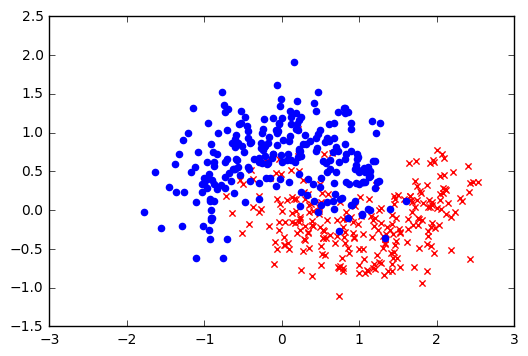

In [7]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='R', marker='x')
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='B', marker='o')

#### 接下来,让我们将数据且分为训练集 和测试集 .训练集用于开发和优化模型.测试集完全分离,直到最后在此运行完成的模型.拥有测试集允许你在之前看不到的数据之外,模型运行良好的估计. 

In [10]:
from sklearn.cross_validation import train_test_split

In [11]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=1, test_size=0.5)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [16]:
knn99 = KNeighborsClassifier(n_neighbors=99)
knn99.fit(XTrain,yTrain)
yPredK99 = knn99.predict(XTest)
print ("Overall Error of k=99 Model:",1 - round(metrics.accuracy_score(yTest, yPredK99), 2))

Overall Error of k=99 Model: 0.15000000000000002


In [17]:
knn1 = KNeighborsClassifier(n_neighbors = 1)
knn1.fit(XTrain, yTrain)
yPredK1 = knn1.predict(XTest)
print ("Overall Error of k=1 Model:", 1 - round(metrics.accuracy_score(yTest, yPredK1), 2))

Overall Error of k=1 Model: 0.15000000000000002


In [19]:
knn50 = KNeighborsClassifier(n_neighbors = 50)
knn50.fit(XTrain, yTrain)
yPredK50 = knn50.predict(XTest)
print ("Overall Error of k=50 Model:", 1 - round(metrics.accuracy_score(yTest, yPredK50), 2))

Overall Error of k=50 Model: 0.10999999999999999


In [21]:
import numpy as np
from sklearn.cross_validation import train_test_split, cross_val_score

knn = KNeighborsClassifier()


# the range of number of neighbors you want to test

n_neighbors = np.arange(1, 141, 2)


# here you store the models for each dataset used

train_scores = list()
test_scores = list()
cv_scores = list()


# loop through possible n_neighbors and try them out

for n in n_neighbors:
    knn.n_neighbors = n
    knn.fit(XTrain, yTrain)
    train_scores.append(1 - metrics.accuracy_score(yTrain, knn.predict(XTrain))) # this will over-estimate the accuracy
    test_scores.append(1 - metrics.accuracy_score(yTest, knn.predict(XTest)))
    cv_scores.append(1 - cross_val_score(knn, XTrain, yTrain, cv = 10).mean()) # you take the mean of the CV scores

In [29]:
np.arange(1, 141, 2)


array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133, 135, 137, 139])

In [25]:
# what do these different datasets think is the best value of k?

print('The best values of k are:')
print('{} according to the Training Set'.format(min(n_neighbors[train_scores == min(train_scores)])))
print('{} according to the Test Set'.format(min(n_neighbors[test_scores == min(test_scores)])))
print('{} according to Cross-Validation'.format(min(n_neighbors[cv_scores == min(cv_scores)])))

The best values of k are:
1 according to the Training Set
23 according to the Test Set
11 according to Cross-Validation
